In [2]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
import cv2
import urllib.request
import json
from tqdm import tqdm
import requests
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
data = pd.read_csv('/content/drive/MyDrive/case_study_2/input/data_4u.csv')

In [4]:
data.head(2)

,created_utc,id,is_nsfw,media,subreddit,subscribers,thumbnail.height,thumbnail.thumbnail,thumbnail.width,title,ups,url,upvote ratio,dank_level,Time_of_day
0,1.628380e+09,p040e9,0,https://i.redd.it/238mczwev0g71.jpg,0,1430077,114.0,https://b.thumbs.redditmedia.com/WBdc-Nus6faSe...,140.0,Invest in ye mudders credit card,167,/r/MemeEconomy/comments/p040e9/invest_in_ye_mu...,6.213456e-08,0,5
1,1.628366e+09,p002qn,0,https://i.redd.it/4yacuh18qzf71.jpg,0,1430077,140.0,https://b.thumbs.redditmedia.com/avzbtegaypC3l...,140.0,Invest in bio-security,60,/r/MemeEconomy/comments/p002qn/invest_in_biose...,6.213456e-08,0,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83244 entries, 0 to 83243
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   created_utc          83244 non-null  float64
 1   id                   83244 non-null  object 
 2   is_nsfw              83244 non-null  int64  
 3   media                83244 non-null  object 
 4   subreddit            83244 non-null  int64  
 5   subscribers          83244 non-null  int64  
 6   thumbnail.height     83244 non-null  float64
 7   thumbnail.thumbnail  83244 non-null  object 
 8   thumbnail.width      83244 non-null  float64
 9   title                83244 non-null  object 
 10  ups                  83244 non-null  int64  
 11  url                  83244 non-null  object 
 12  upvote ratio         83244 non-null  float64
 13  dank_level           83244 non-null  int64  
 14  Time_of_day          83244 non-null  int64  
dtypes: float64(4), int64(6), object(5)
m

Text(0.5, 1.0, ' Number of upvotes for each subreddit ')

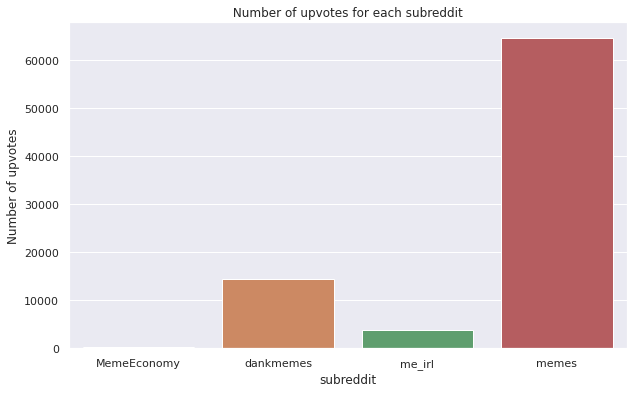

In [ ]:
a = data.groupby(['subreddit'])['ups'].count()
a = a.reset_index()
a = a.rename(columns={'ups': 'Number of upvotes'})
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='subreddit', y='Number of upvotes', data=a)
plt.xlabel("subreddit")
plt.xticks(range(4),['MemeEconomy','dankmemes','me_irl','memes'])
plt.ylabel("Number of upvotes")
plt.title(' Number of upvotes for each subreddit ')

Text(0.5, 1.0, ' Number of subscribers for each subreddit ')

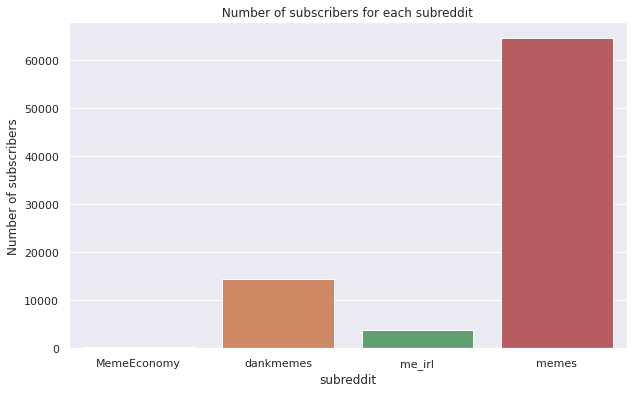

In [ ]:
a = data.groupby(['subreddit'])['subscribers'].count()
a = a.reset_index()
a = a.rename(columns={'subscribers': 'Number of subscribers'})
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='subreddit', y='Number of subscribers', data=a)
plt.xlabel("subreddit")
plt.xticks(range(4),['MemeEconomy','dankmemes','me_irl','memes'])
plt.ylabel("Number of subscribers")
plt.title(' Number of subscribers for each subreddit ')

In [ ]:
memeeconomy = np.median(data[data.subreddit==0]['ups'])
dankmemes = np.median(data[data.subreddit==1]['ups'])
me_irl = np.median(data[data.subreddit==2]['ups'])
memes = np.median(data[data.subreddit==3]['ups'])
memeeconomy_ = np.median(data[data.subreddit==0]['subscribers'])
dankmemes_ = np.median(data[data.subreddit==1]['subscribers'])
me_irl_ = np.median(data[data.subreddit==2]['subscribers'])
memes_ = np.median(data[data.subreddit==3]['subscribers'])

In [ ]:
from scipy.stats import pearsonr

corr, _ = pearsonr([memeeconomy,dankmemes,me_irl,memes],[memeeconomy_,dankmemes_,me_irl_,memes_])
print('Pearsons correlation: %.3f'%corr)

Pearsons correlation: 0.770


*  From this correlation value we say that there is a linear realtionship between upvotes and subscribers

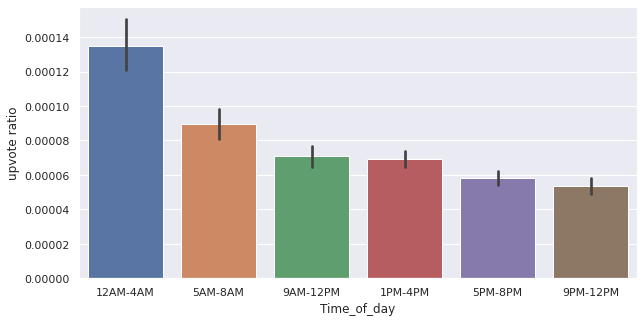

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Time_of_day',y='upvote ratio',data=data)
plt.xticks(range(6),['12AM-4AM','5AM-8AM','9AM-12PM','1PM-4PM','5PM-8PM','9PM-12PM'])
plt.show()

*  From this we observe that 12AM-4AM have high upvote ratio means dank memes are created more in this time period

Text(0.5, 1.0, 'Count of Memes vs Time_of_day ')

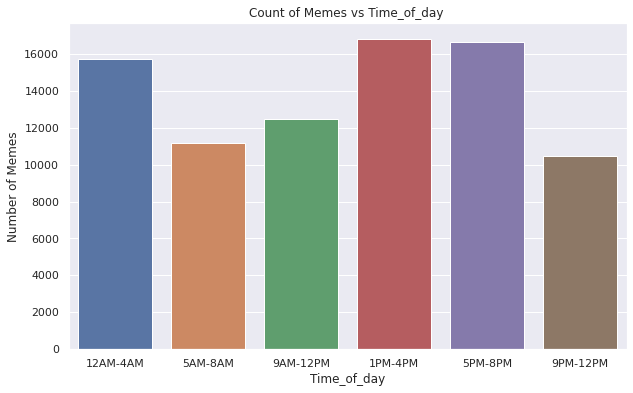

In [ ]:
a = data.groupby(['Time_of_day'])['id'].count()
a = a.reset_index()
a = a.rename(columns={'id': 'Number of Memes'})
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Time_of_day', y='Number of Memes', data=a)
plt.xlabel("Time_of_day")
plt.xticks(range(6),['12AM-4AM','5AM-8AM','9AM-12PM','1PM-4PM','5PM-8PM','9PM-12PM'])
plt.ylabel("Number of Memes")
plt.title('Count of Memes vs Time_of_day ')

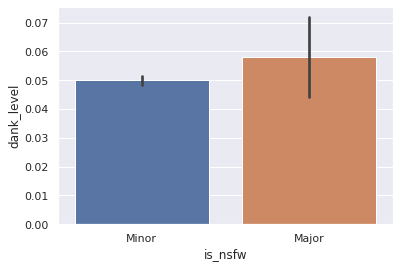

In [ ]:
sns.barplot(x='is_nsfw',y='dank_level',data=data)
plt.xticks(range(2),['Minor','Major'])
plt.show()

Text(0.5, 1.0, 'Distribution of Memes')

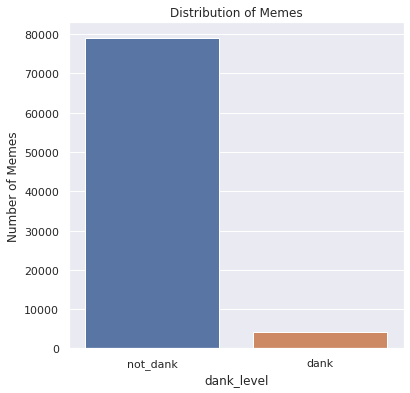

In [ ]:
a = data.groupby(['dank_level'])['id'].count()
a = a.reset_index()
a = a.rename(columns={'id': 'Number of Memes'})
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x='dank_level', y='Number of Memes', data=a)
plt.xlabel("dank_level")
plt.ylabel('Number of Memes')
plt.xticks(range(2),['not_dank','dank'])
plt.title('Distribution of Memes')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


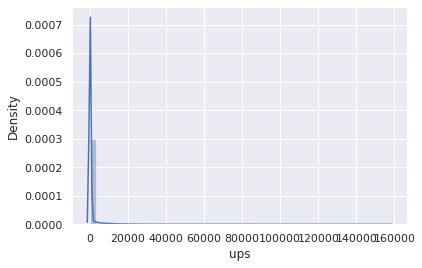

In [ ]:
sns.distplot(data['ups'], color='b')

*  This looks like long tailed distribution means few memes have high upvote ratio and more memes have less upvote ratio

## Analysis on title feature

In [ ]:
data['stopwords'] = data['title'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['title','stopwords']].head()

,title,stopwords
0,Invest in ye mudders credit card,1
1,Invest in bio-security,1
2,INVEST in Jontron slicing the price in half! A...,4
3,Invest right now,1
4,Invest in Elmo in Vietnam,2


In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

data['punctuation'] = data['title'].apply(lambda x: count_punct(x))
data[['title','punctuation']].head()

,title,punctuation
0,Invest in ye mudders credit card,0
1,Invest in bio-security,1
2,INVEST in Jontron slicing the price in half! A...,2
3,Invest right now,0
4,Invest in Elmo in Vietnam,0


In [ ]:
data['hastags'] = data['title'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['title','hastags']].head()

,title,hastags
0,Invest in ye mudders credit card,0
1,Invest in bio-security,0
2,INVEST in Jontron slicing the price in half! A...,0
3,Invest right now,0
4,Invest in Elmo in Vietnam,0


In [ ]:
data.hastags.loc[data.hastags != 0].count()

228

In [ ]:
freq = pd.Series(' '.join(data['title']).split()).value_counts()[:20]
freq

I       10037
the      9787
a        8187
to       6870
is       6111
you      4791
this     4572
it       4555
of       4058
in       3524
my       3479
me       3336
for      2952
be       2837
and      2804
that     2460
The      2377
like     2285
meme     2281
on       2134
dtype: int64

In [ ]:
data['word_count'] = data['title'].apply(lambda x: len(str(x).split(" ")))
data[['title','word_count']].head()

,title,word_count
0,Invest in ye mudders credit card,6
1,Invest in bio-security,3
2,INVEST in Jontron slicing the price in half! A...,15
3,Invest right now,3
4,Invest in Elmo in Vietnam,5


Text(0.5, 1.0, 'Distribution of Memes')

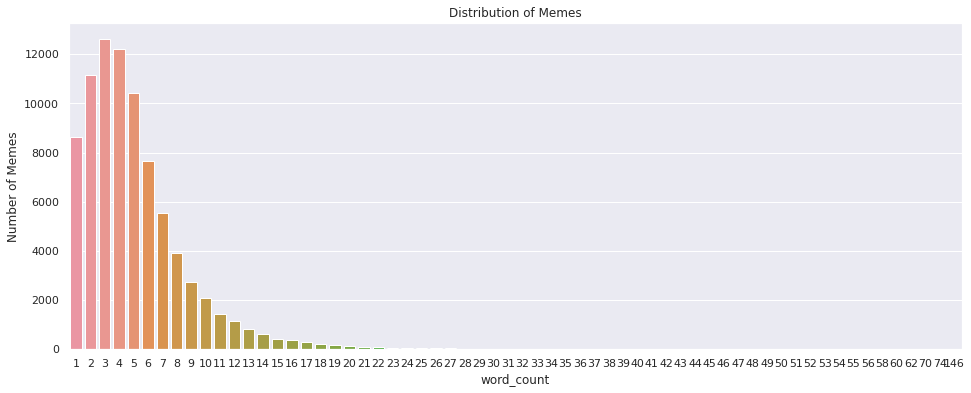

In [ ]:
a = data.groupby(['word_count'])['id'].count()
a = a.reset_index()
a = a.rename(columns={'id': 'Number of Memes'})
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='word_count', y='Number of Memes', data=a)
plt.xlabel("word_count")
plt.ylabel('Number of Memes')
#plt.xticks(range(2),['not_dank','dank'])
plt.title('Distribution of Memes')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


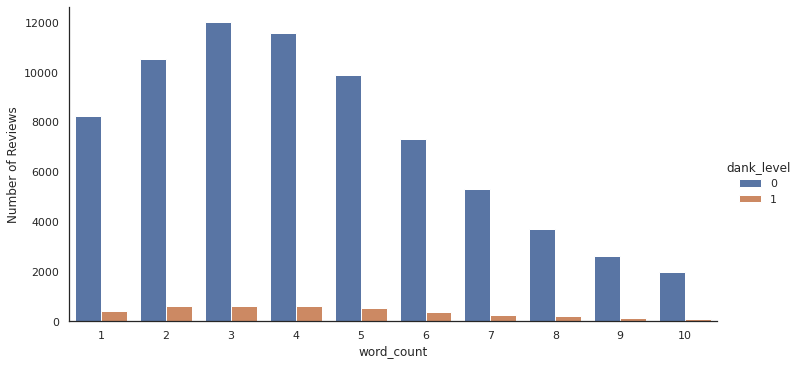

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot( 'word_count', data= data.loc[data.word_count <= 10], aspect= 2, kind='count', 
                    hue='dank_level', hue_order=data['dank_level'].value_counts().sort_values(ascending=False).index)
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('word_count')
    g.set_titles('Distribition of word_count for dank and not dank')

In [7]:
#Word cloud 
text_for_cloud = " ".join(x for x in data.title)
print ("There are {} words in the memes.".format(len(text_for_cloud)))

There are 2259402 words in the memes.


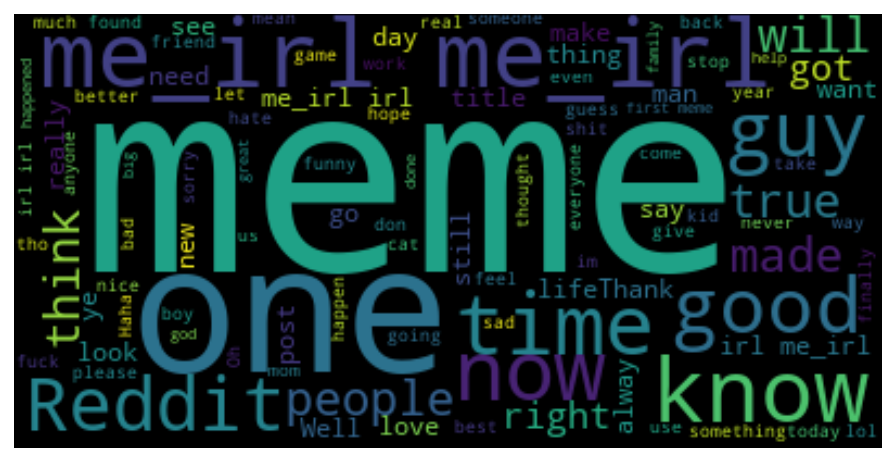

In [8]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words= 100).generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize= (8,8), dpi= 140)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
from skimage import io
def url_to_cvimage(url):
    try:
        image = io.imread(url)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.waitKey(0)
        return image
    except:
        return "N/A"

In [10]:
def cvimage_to_pic(cvimage):
    temp = cv2.cvtColor(cvimage, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(temp)
    plt.show()

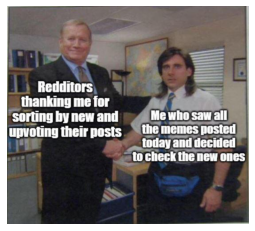

In [15]:
cvimage_to_pic(url_to_cvimage(data.media.values[49000]))

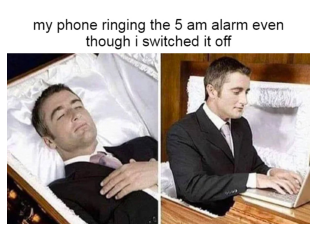

In [18]:
cvimage_to_pic(url_to_cvimage(data.media.values[8880]))

Text(0.5, 1.0, 'Distribution of heights of Memeimages')

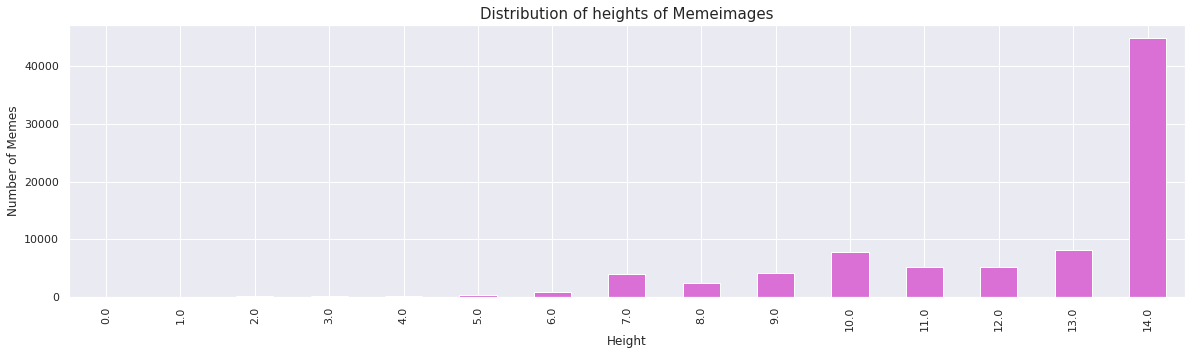

In [28]:
data.id.groupby(data['thumbnail.height']//10).count().plot(kind="bar", figsize=(20,5), color = 'orchid')
plt.xlabel('Height of image')
plt.ylabel('Number of Memes')
plt.title('Distribution of heights of Memeimages', fontsize=15)

* Heights of images vary from 50 to 140. But almost all  images have height range 140

Text(0.5, 1.0, 'Distribution of width of Memeimages')

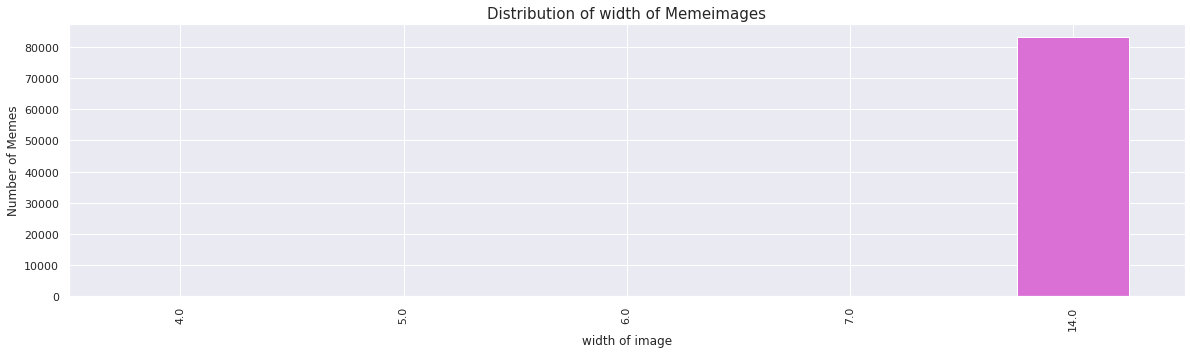

In [29]:
data.id.groupby(data['thumbnail.width']//10).count().plot(kind="bar", figsize=(20,5), color = 'orchid')
plt.xlabel('width of image')
plt.ylabel('Number of Memes')
plt.title('Distribution of width of Memeimages', fontsize=15)

* All images have width 140.

* created_utc, is_nsfw, media, subreddit, upvotes, title, subscribers are important features for deployment.